## Salman Sabahi
## Programming with Python, Final Project
## Date Created: Dec 20, 2018

# Sleep data :

## Part 1: warm up !

### Download and import data from: 

    https://www.dropbox.com/s/mtwl4nyo3lp00gy/sleepdata.csv?dl=0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [2]:
sleep_df1 = pd.read_csv('./data/sleepdata.csv',sep=';')
sleep_df1.head()

Start                  End Sleep quality Time in bed  \
0  2011-06-19 08:42:08  2011-06-19 13:22:13           51%        4:40   
1  2011-06-29 07:27:53  2011-06-29 12:39:43           57%        5:11   
2  2011-06-30 08:04:06  2011-06-30 10:51:15           34%        2:47   
3  2011-07-04 05:48:35  2011-07-04 12:27:00           73%        6:38   
4  2011-07-05 05:46:29  2011-07-05 10:42:00           51%        4:55   

   Wake up  Sleep Notes  Heart rate  Activity (steps)  
0      NaN          NaN         NaN                 0  
1      NaN          NaN         NaN                 0  
2      NaN          NaN         NaN                 0  
3      NaN          NaN         NaN                 0  
4      NaN          NaN         NaN                 0

In [3]:
sleep_df1.columns

Index(['Start', 'End', 'Sleep quality', 'Time in bed', 'Wake up',
       'Sleep Notes', 'Heart rate', 'Activity (steps)'],
      dtype='object')

In [4]:
def time_con(t):
    (h, m) = t.split(':')
    result = int(h) * 60 + int(m) * 1
    return(result)

In [5]:
sleep_df1['Time in bed_min'] = sleep_df1.apply(lambda i: time_con(i['Time in bed']), axis=1)
sleep_df1['Start'] = pd.to_datetime(sleep_df1['Start'])
sleep_df1['End'] = pd.to_datetime(sleep_df1['End'])
s = sleep_df1['Sleep quality'].apply(lambda x: x.split('%')[0])
sleep_df1['Sleep quality'] = pd.to_numeric(s)/100
sleep_df1.head()

Start                 End  Sleep quality Time in bed  Wake up  \
0 2011-06-19 08:42:08 2011-06-19 13:22:13           0.51        4:40      NaN   
1 2011-06-29 07:27:53 2011-06-29 12:39:43           0.57        5:11      NaN   
2 2011-06-30 08:04:06 2011-06-30 10:51:15           0.34        2:47      NaN   
3 2011-07-04 05:48:35 2011-07-04 12:27:00           0.73        6:38      NaN   
4 2011-07-05 05:46:29 2011-07-05 10:42:00           0.51        4:55      NaN   

   Sleep Notes  Heart rate  Activity (steps)  Time in bed_min  
0          NaN         NaN                 0              280  
1          NaN         NaN                 0              311  
2          NaN         NaN                 0              167  
3          NaN         NaN                 0              398  
4          NaN         NaN                 0              295

In [6]:
sleep_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 9 columns):
Start               538 non-null datetime64[ns]
End                 538 non-null datetime64[ns]
Sleep quality       538 non-null float64
Time in bed         538 non-null object
Wake up             0 non-null float64
Sleep Notes         0 non-null float64
Heart rate          5 non-null float64
Activity (steps)    538 non-null int64
Time in bed_min     538 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 37.9+ KB


In [7]:
sleep_df1.dtypes

Start               datetime64[ns]
End                 datetime64[ns]
Sleep quality              float64
Time in bed                 object
Wake up                    float64
Sleep Notes                float64
Heart rate                 float64
Activity (steps)             int64
Time in bed_min              int64
dtype: object

### Importannt columns are defined based on the number of non-values (the higher the better). For example the hear rate column has 5 non values and we can remove it. Therefore, new sleep dataframe was created without important columns. 


In [8]:
sleep_df1n = sleep_df1[['Start','End','Sleep quality','Time in bed', 'Activity (steps)','Time in bed_min']]
sleep_df1n.head()

Start                 End  Sleep quality Time in bed  \
0 2011-06-19 08:42:08 2011-06-19 13:22:13           0.51        4:40   
1 2011-06-29 07:27:53 2011-06-29 12:39:43           0.57        5:11   
2 2011-06-30 08:04:06 2011-06-30 10:51:15           0.34        2:47   
3 2011-07-04 05:48:35 2011-07-04 12:27:00           0.73        6:38   
4 2011-07-05 05:46:29 2011-07-05 10:42:00           0.51        4:55   

   Activity (steps)  Time in bed_min  
0                 0              280  
1                 0              311  
2                 0              167  
3                 0              398  
4                 0              295

### Bedtime Hours:

What is  most common hours? You can make a histogram of bedtime hour !


Text(0.5,0,'Starting Time')

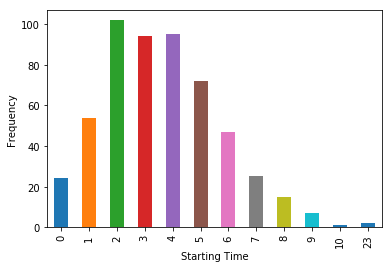

In [9]:
g = (sleep_df1n.groupby(sleep_df1n['Start'].dt.hour)['Time in bed_min'].count()).plot(kind='bar')
g.set_ylabel('Frequency')
g.set_xlabel('Starting Time')

### Conclusion ?

What does the plot show about the sleep pattern ?

Clearly, I should be sleeping earlier. According to this graph, the most common hour I fall asleep is 2 in the morning. However, I should be mindful of bias since I am less likely to initialize the Sleep Cycle app when I’m super tired - as is often the case when I fall asleep before midnight.

### Sleep Duration:

How long slept for when fell asleep. 

Can plot a histogram based on minutes of sleep

Text(0.5,0,'Time-hr')

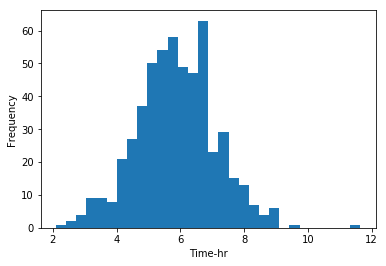

In [10]:
g = (sleep_df1n['Time in bed_min']/60).plot(kind = 'hist',bins=30)
g.set_xlabel('Time-hr')

### Conclusion ?

An approximately normal distribution as expected with the large sample size. On average, I slept about 355 minutes, or 5 hours and 55 minutes per night. Take note that the mean is pulled up by an outlier, the result of a 12 hour hibernation on a warm summer night last year.

### Sleep Duration Over Time:

How has the duration of sleep changed over time ?

__Note that you might want to fit a regression curve to the scatter plot you make !__

__Now modify your plot to include sleep quality as a new dimension !__

Text(0,0.5,'Hours of Sleep')

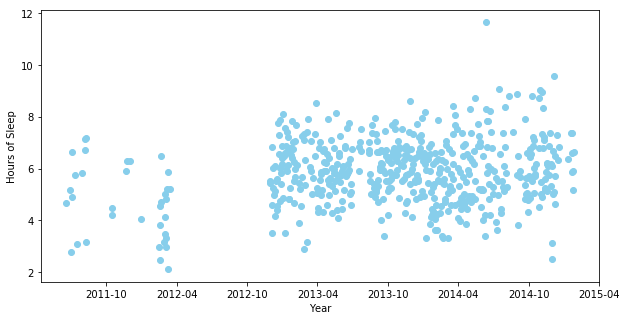

In [11]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

x = sleep_df1n['Start'].dt.date
y = sleep_df1n['Time in bed_min']/60
ax.plot_date(x, y, xdate=True, ydate=False, color='skyblue')
ax.set_xlabel('Year')
ax.set_ylabel('Hours of Sleep')

### Conclusion ?

Can you notice any change around August 2013 ?


### Sleep Quality Over Time:

Sleep Quality is affected by two factors:

    - Total time asleep
    - Amount of movement


Since we don’t have access to the movement data, we can’t verify the relationship between movement and sleep quality. 

However, we can check the relationship between sleep duration and sleep quality. Create a visualization of that !

In [12]:
sleep_df_nozac = sleep_df1n.iloc[sleep_df1n['Activity (steps)'].nonzero()[0]] # zero activities were dropped
# sleep_df_nozac = sleep_df1n[sleep_df1n['Activity (steps)']!=0] # Another way to remove zero activities

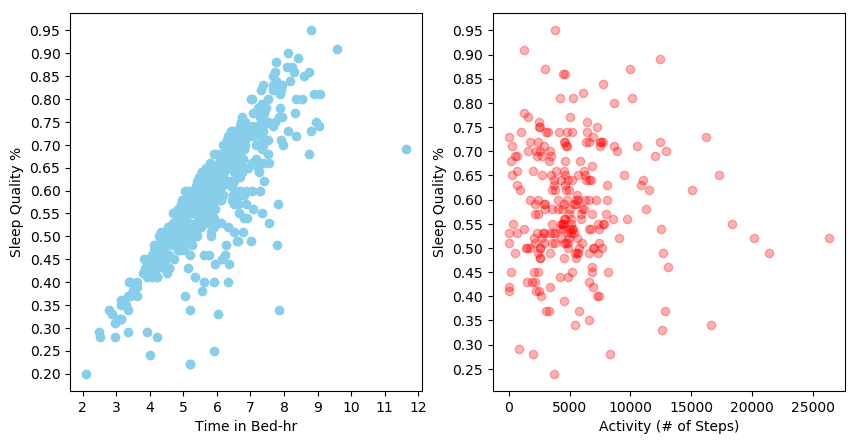

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5), dpi = 100)

y = sleep_df1n['Sleep quality']
x = sleep_df1n['Time in bed_min']/60
axes[0].set_xlabel('Time in Bed-hr')
axes[0].set_ylabel('Sleep Quality %')
axes[0].set_xticks(range(0,13))
axes[0].set_yticks(np.linspace(0,1,21))
axes[0].plot_date(x, y, xdate=False, ydate=False, color='skyblue')

y = sleep_df_nozac['Sleep quality']
x = sleep_df_nozac['Activity (steps)']
axes[1].set_xlabel('Activity (# of Steps)')
axes[1].set_ylabel('Sleep Quality %')
axes[1].set_yticks(np.linspace(0,1,21))
axes[1].plot_date(x, y, xdate=False, ydate=False, color='red', alpha = 0.3)

In [14]:
# There is no clear relationshipe betweeen number of steps and sleep quality.

### Does duration mean quality ?

Given this information, it is possible for sleep quality to increase even when sleep duration decreases, especially if there is less movement in bed ! S


 plot sleep quality over time to find out if this is true !

## Part 2: A similar realistic situation:

- Lets conisder a similar where we have got sleep data from a devices. Expand on what you did above and come with extra analysis of yours. Make conclusions based on your observations

- Download the data: https://www.dropbox.com/s/7fdmc0l3410g8hu/sleep-export2.csv?dl=0

- Here are some extra info you might need:
     - http://developer.samsung.com/health/server/api/data-types/sleep
     - http://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.Sleep.html

    - https://currentmillis.com/tutorials/system-currentTimeMillis.html#utc

## Part 3 (optional ... I wouldn't do that if I were you !) : A messy realistic situation:

- Lets conisder a more realistic situation where we have got sleep data from two different devices but off the same source !

- The data is not clean. It has missing records; The format is different;

- The goal here is to develop a script that cleans up and puts the data in a format we can easily use. So, we need to make sense of the data and also clean it up for analysis...

- Download the data here : https://www.dropbox.com/s/o6mbznc047z1pxs/sleep-export.csv?dl=0

In [15]:
sleep_df2 = pd.read_csv('./data/sleep-export2.csv')
sleep_df2.head()

Unnamed: 0  efficiency  has_sleep_data  \
0           0   92.663040             1.0   
1           1   87.788020             1.0   
2           2   90.026955             1.0   
3           3   93.162390             1.0   
4           4   93.750000             1.0   

      com.samsung.health.sleep.datauuid  quality  \
0  03f12ce0-9ade-5c74-9d57-686fd3966f2a  50003.0   
1  0419de25-ff8a-e425-0864-7e83b7f5d991      NaN   
2  048b90e0-1e31-7875-337c-e9d8c24bea59      NaN   
3  058e45d4-2bda-fc5f-6545-c965c65fea43      NaN   
4  059021fb-39a7-ab8c-e488-662743e11821      NaN   

   com.samsung.health.sleep.custom  com.samsung.health.sleep.end_time  \
0                              NaN                      1520501400000   
1                              NaN                      1519565280000   
2                              NaN                      1527932940000   
3                              NaN                      1529749920000   
4                              NaN                      1515159660000   

   original_wake_up_time  com.samsung.health.sleep.start_time  \
0           1.520501e+12                        1520479380000   
1                    NaN                        1519539300000   
2                    NaN                        1527910620000   
3                    NaN                        1529735940000   
4                    NaN                        1515128040000   

  com.samsung.health.sleep.time_offset  com.samsung.health.sleep.update_time  \
0                             UTC-0400                         1520516398387   
1                             UTC-0400                         1519565416332   
2                             UTC-0300                         1527932972094   
3                             UTC-0300                         1529750846337   
4                             UTC-0400                         1515159899850   

   original_bed_time  com.samsung.health.sleep.create_time  \
0       1.520479e+12                         1520501522181   
1                NaN                         1519565416332   
2                NaN                         1527932972094   
3                NaN                         1529750846337   
4                NaN                         1515159899850   

   original_efficiency  
0             92.66304  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [16]:
sleep_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 14 columns):
Unnamed: 0                              279 non-null int64
efficiency                              279 non-null float64
has_sleep_data                          277 non-null float64
com.samsung.health.sleep.datauuid       279 non-null object
quality                                 38 non-null float64
com.samsung.health.sleep.custom         0 non-null float64
com.samsung.health.sleep.end_time       279 non-null int64
original_wake_up_time                   36 non-null float64
com.samsung.health.sleep.start_time     279 non-null int64
com.samsung.health.sleep.time_offset    279 non-null object
com.samsung.health.sleep.update_time    279 non-null int64
original_bed_time                       36 non-null float64
com.samsung.health.sleep.create_time    279 non-null int64
original_efficiency                     36 non-null float64
dtypes: float64(7), int64(5), object(2)
memory usage: 30.6+

In [17]:
# column names were change and got shortened and also less important columns were removed. This approach was applied to all dataframes.
sleep_df2.columns
sleep_df2.rename(columns={'efficiency':'Efficiency','com.samsung.health.sleep.datauuid':'Datauuid', 'com.samsung.health.sleep.end_time':'End_UNIX',\
                         'com.samsung.health.sleep.start_time' :'Start_UNIX', 'com.samsung.health.sleep.time_offset' :'Offset'\
                         }, inplace=True)

sleep_df2.head()

Unnamed: 0  Efficiency  has_sleep_data  \
0           0   92.663040             1.0   
1           1   87.788020             1.0   
2           2   90.026955             1.0   
3           3   93.162390             1.0   
4           4   93.750000             1.0   

                               Datauuid  quality  \
0  03f12ce0-9ade-5c74-9d57-686fd3966f2a  50003.0   
1  0419de25-ff8a-e425-0864-7e83b7f5d991      NaN   
2  048b90e0-1e31-7875-337c-e9d8c24bea59      NaN   
3  058e45d4-2bda-fc5f-6545-c965c65fea43      NaN   
4  059021fb-39a7-ab8c-e488-662743e11821      NaN   

   com.samsung.health.sleep.custom       End_UNIX  original_wake_up_time  \
0                              NaN  1520501400000           1.520501e+12   
1                              NaN  1519565280000                    NaN   
2                              NaN  1527932940000                    NaN   
3                              NaN  1529749920000                    NaN   
4                              NaN  1515159660000                    NaN   

      Start_UNIX    Offset  com.samsung.health.sleep.update_time  \
0  1520479380000  UTC-0400                         1520516398387   
1  1519539300000  UTC-0400                         1519565416332   
2  1527910620000  UTC-0300                         1527932972094   
3  1529735940000  UTC-0300                         1529750846337   
4  1515128040000  UTC-0400                         1515159899850   

   original_bed_time  com.samsung.health.sleep.create_time  \
0       1.520479e+12                         1520501522181   
1                NaN                         1519565416332   
2                NaN                         1527932972094   
3                NaN                         1529750846337   
4                NaN                         1515159899850   

   original_efficiency  
0             92.66304  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [18]:
sleep_df2n = sleep_df2[['Efficiency', 'Start_UNIX', 'End_UNIX', 'Offset','Datauuid']]
sleep_df2n.head()

Efficiency     Start_UNIX       End_UNIX    Offset  \
0   92.663040  1520479380000  1520501400000  UTC-0400   
1   87.788020  1519539300000  1519565280000  UTC-0400   
2   90.026955  1527910620000  1527932940000  UTC-0300   
3   93.162390  1529735940000  1529749920000  UTC-0300   
4   93.750000  1515128040000  1515159660000  UTC-0400   

                               Datauuid  
0  03f12ce0-9ade-5c74-9d57-686fd3966f2a  
1  0419de25-ff8a-e425-0864-7e83b7f5d991  
2  048b90e0-1e31-7875-337c-e9d8c24bea59  
3  058e45d4-2bda-fc5f-6545-c965c65fea43  
4  059021fb-39a7-ab8c-e488-662743e11821

In [19]:
sleep_df2n.groupby(['Offset']).describe()

Efficiency                                                       \
              count       mean        std      min        25%        50%   
Offset                                                                     
UTC-0300      188.0  89.770952  12.322914   0.0000  89.897931  92.227974   
UTC-0400       79.0  86.300678  23.101270   0.0000  91.304350  92.822970   
UTC-0700       12.0  91.370139   1.905644  88.5965  89.889685  91.742773   

                               End_UNIX                    ...       \
                75%        max    count          mean      ...        
Offset                                                     ...        
UTC-0300  93.548386  97.229920    188.0  1.526868e+12      ...        
UTC-0400  94.261265  96.572580     79.0  1.517376e+12      ...        
UTC-0700  93.011501  94.117645     12.0  1.514413e+12      ...        

                                     Start_UNIX                              \
                   75%           max      count          mean           std   
Offset                                                                        
UTC-0300  1.529760e+12  1.532863e+12      188.0  1.526848e+12  3.420382e+09   
UTC-0400  1.518825e+12  1.520679e+12       79.0  1.517353e+12  1.839924e+09   
UTC-0700  1.514671e+12  1.514821e+12       12.0  1.514387e+12  3.034878e+08   

                                                                                
                   min           25%           50%           75%           max  
Offset                                                                          
UTC-0300  1.520734e+12  1.523919e+12  1.526835e+12  1.529748e+12  1.532837e+12  
UTC-0400  1.513401e+12  1.515914e+12  1.517221e+12  1.518794e+12  1.520653e+12  
UTC-0700  1.513933e+12  1.514157e+12  1.514364e+12  1.514639e+12  1.514806e+12  

[3 rows x 24 columns]

In [20]:
sleep_df2n['Offset'].unique()

array(['UTC-0400', 'UTC-0300', 'UTC-0700'], dtype=object)

In [21]:
# In this step time zone was adjusted and two new columns Start and End were created.
# To have a consistent dataframe, First all UNIX timestamps were converted to UTC-Eatsern and then according to the 
# time zone it was changed to the local time.

sleep_df2n['Start'] = sleep_df2n.apply(lambda row: datetime.fromtimestamp(row['Start_UNIX']/1000) + timedelta(hours=1)\
                                      if row['Offset']=='UTC-0400'\
                                      else datetime.fromtimestamp(row['Start_UNIX']/1000) + timedelta(hours=2)  if row['Offset']=='UTC-0300' \
                                      else datetime.fromtimestamp(row['Start_UNIX']/1000) - timedelta(hours=2),axis=1 ) 


sleep_df2n['End'] = sleep_df2n.apply(lambda row: datetime.fromtimestamp(row['End_UNIX']/1000) + timedelta(hours=1)\
                                      if row['Offset']=='UTC-0400'\
                                      else datetime.fromtimestamp(row['End_UNIX']/1000) + timedelta(hours=2)  if row['Offset']=='UTC-0300' \
                                      else datetime.fromtimestamp(row['End_UNIX']/1000) - timedelta(hours=2),axis=1 ) 


C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
# Now "Time in bed" in minutes is calculated using the following function. 

def delta(x,y):
    fmt = '%Y-%m-%d %H:%M:%S'
    st = x.strftime('%Y-%m-%d %H:%M:%S')
    en = y.strftime('%Y-%m-%d %H:%M:%S')
    
    start = datetime.strptime(st, fmt)
    end = datetime.strptime(en, fmt)

    return(end-start).seconds

In [23]:
sleep_df2n['Time in bed_min'] = (sleep_df2n.apply(lambda row: delta(row['Start'],row['End'] ), axis=1))/60


C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
sleep_df2n.head()

Efficiency     Start_UNIX       End_UNIX    Offset  \
0   92.663040  1520479380000  1520501400000  UTC-0400   
1   87.788020  1519539300000  1519565280000  UTC-0400   
2   90.026955  1527910620000  1527932940000  UTC-0300   
3   93.162390  1529735940000  1529749920000  UTC-0300   
4   93.750000  1515128040000  1515159660000  UTC-0400   

                               Datauuid               Start  \
0  03f12ce0-9ade-5c74-9d57-686fd3966f2a 2018-03-07 23:23:00   
1  0419de25-ff8a-e425-0864-7e83b7f5d991 2018-02-25 02:15:00   
2  048b90e0-1e31-7875-337c-e9d8c24bea59 2018-06-02 01:37:00   
3  058e45d4-2bda-fc5f-6545-c965c65fea43 2018-06-23 04:39:00   
4  059021fb-39a7-ab8c-e488-662743e11821 2018-01-05 00:54:00   

                  End  Time in bed_min  
0 2018-03-08 05:30:00            367.0  
1 2018-02-25 09:28:00            433.0  
2 2018-06-02 07:49:00            372.0  
3 2018-06-23 08:32:00            233.0  
4 2018-01-05 09:41:00            527.0

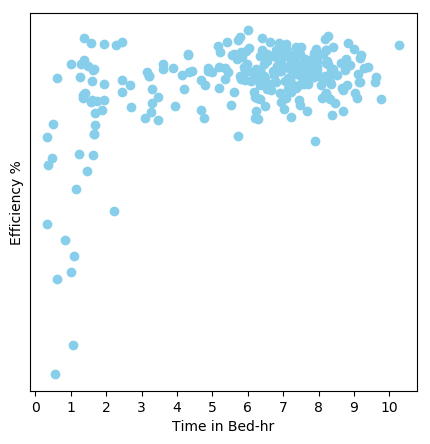

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (5,5), dpi = 100)

sleep_df2noz = sleep_df2n[sleep_df2n['Efficiency']!=0]
y = sleep_df2noz['Efficiency']
x = sleep_df2noz['Time in bed_min']/60
axes.set_xlabel('Time in Bed-hr')
axes.set_ylabel('Efficiency %')
axes.set_xticks(range(0,13))
axes.set_yticks(np.linspace(0,1,21))
axes.plot_date(x, y, xdate=False, ydate=False, color='skyblue')

In [26]:
# There is no relationship between time in bed hour and efficiency

Text(0.5,0,'Starting Time')

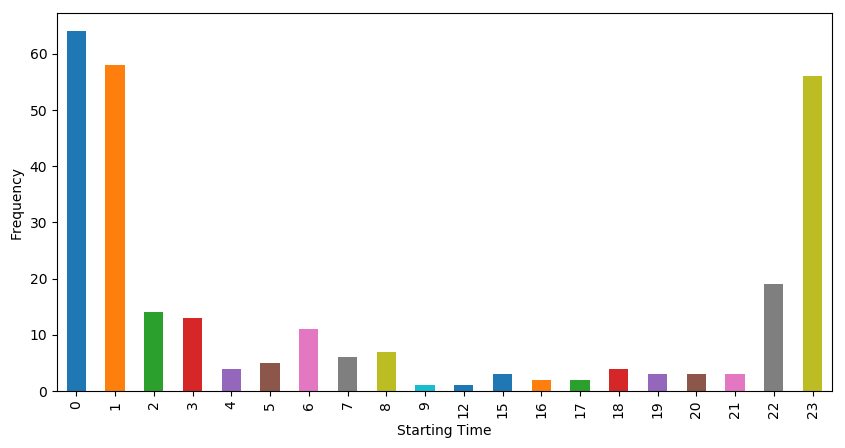

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10,5), dpi = 100)

g = (sleep_df2n.groupby(sleep_df2n['Start'].dt.hour)['Time in bed_min'].count()).plot(kind='bar')
g.set_ylabel('Frequency')
g.set_xlabel('Starting Time')

In [28]:
# Using adjusted time zone, it is clear that the individual goes to bed mostly between 11 pm to 1 am. 

## Importing floor dataframe

In [29]:
floor_df = pd.read_csv('./data/floors_climbed.csv')
floor_df.head()

Unnamed: 0                 end_time                     pkg_name  \
0           0  2018-01-24 21:30:56.000  com.sec.android.app.shealth   
1           1  2018-03-27 21:04:27.000  com.sec.android.app.shealth   
2           2  2018-02-12 07:40:16.000  com.sec.android.app.shealth   
3           3  2018-03-16 17:17:22.000  com.sec.android.app.shealth   
4           4  2018-01-22 15:50:38.000  com.sec.android.app.shealth   

  time_offset               start_time  floor  \
0    UTC-0400  2018-01-24 21:29:51.000    2.0   
1    UTC-0300  2018-03-27 21:04:01.000    1.0   
2    UTC-0400  2018-02-12 07:38:21.000    2.0   
3    UTC-0300  2018-03-16 17:17:05.000    1.0   
4    UTC-0400  2018-01-22 15:50:22.000    1.0   

                               datauuid              update_time  \
0  00443274-6e30-97f9-3eb2-75d17f3e766f  2018-01-24 21:34:47.756   
1  00ed787d-a38b-8fcf-886d-b15a30e02ff6  2018-03-27 21:11:51.606   
2  012ee314-b5de-8ac7-0421-c634e858ebc4  2018-02-12 07:41:27.854   
3  016876d6-2d1f-5514-a6c2-12b580e0654c  2018-03-16 17:22:41.066   
4  01c24d32-905b-9f65-732e-3c13faf2a1c4  2018-01-22 15:52:59.388   

               create_time  
0  2018-01-24 21:34:47.720  
1  2018-03-27 21:11:51.606  
2  2018-02-12 07:41:27.802  
3  2018-03-16 17:22:41.044  
4  2018-01-22 15:52:59.367

In [30]:
floor_dfn = floor_df[['start_time','end_time','time_offset','floor','datauuid']]
floor_dfn.rename(columns={'start_time':'Start','end_time':'End','time_offset':'Offset',
                          'floor':'Floor','datauuid':'Datauuid'}, inplace=True)
floor_dfn.head()

C:\Users\Salman\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Start                      End    Offset  Floor  \
0  2018-01-24 21:29:51.000  2018-01-24 21:30:56.000  UTC-0400    2.0   
1  2018-03-27 21:04:01.000  2018-03-27 21:04:27.000  UTC-0300    1.0   
2  2018-02-12 07:38:21.000  2018-02-12 07:40:16.000  UTC-0400    2.0   
3  2018-03-16 17:17:05.000  2018-03-16 17:17:22.000  UTC-0300    1.0   
4  2018-01-22 15:50:22.000  2018-01-22 15:50:38.000  UTC-0400    1.0   

                               Datauuid  
0  00443274-6e30-97f9-3eb2-75d17f3e766f  
1  00ed787d-a38b-8fcf-886d-b15a30e02ff6  
2  012ee314-b5de-8ac7-0421-c634e858ebc4  
3  016876d6-2d1f-5514-a6c2-12b580e0654c  
4  01c24d32-905b-9f65-732e-3c13faf2a1c4

In [31]:
# Since the duration is not very important for this dataframe, just Start time is used to see the pattern of floor climbing
# In addition, one floor was removed since it is very possible that the person climbs one floor every day.


In [32]:
floor_dfmfn = floor_dfn[floor_dfn['Floor'] >1] # new modified floor dataframe
floor_dfmfn['Start'] = pd.to_datetime(floor_dfmfn['Start'])
floor_dfmfn['End'] = pd.to_datetime(floor_dfmfn['End'])

# Two columns weekday and month were added.
floor_dfmfn['Month'] = floor_dfmfn['Start'].dt.month_name()
floor_dfmfn['Weekday'] = floor_dfmfn['Start'].dt.weekday_name

floor_dfmfn.head()

C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Start                 End    Offset  Floor  \
0 2018-01-24 21:29:51 2018-01-24 21:30:56  UTC-0400    2.0   
2 2018-02-12 07:38:21 2018-02-12 07:40:16  UTC-0400    2.0   
6 2017-12-31 13:25:15 2017-12-31 13:25:44  UTC-0700    2.0   
8 2017-12-24 11:44:06 2017-12-24 11:44:44  UTC-0700    2.0   
9 2018-02-16 08:23:13 2018-02-16 08:24:33  UTC-0400    2.0   

                               Datauuid     Month    Weekday  
0  00443274-6e30-97f9-3eb2-75d17f3e766f   January  Wednesday  
2  012ee314-b5de-8ac7-0421-c634e858ebc4  February     Monday  
6  03daea81-702c-4c3e-c656-9c3d2dc9f6b2  December     Sunday  
8  04bb2565-d4da-ef2a-b42b-e1f54ab2137d  December     Sunday  
9  0514b64c-861c-d27d-5b8e-b061d71a8779  February     Friday

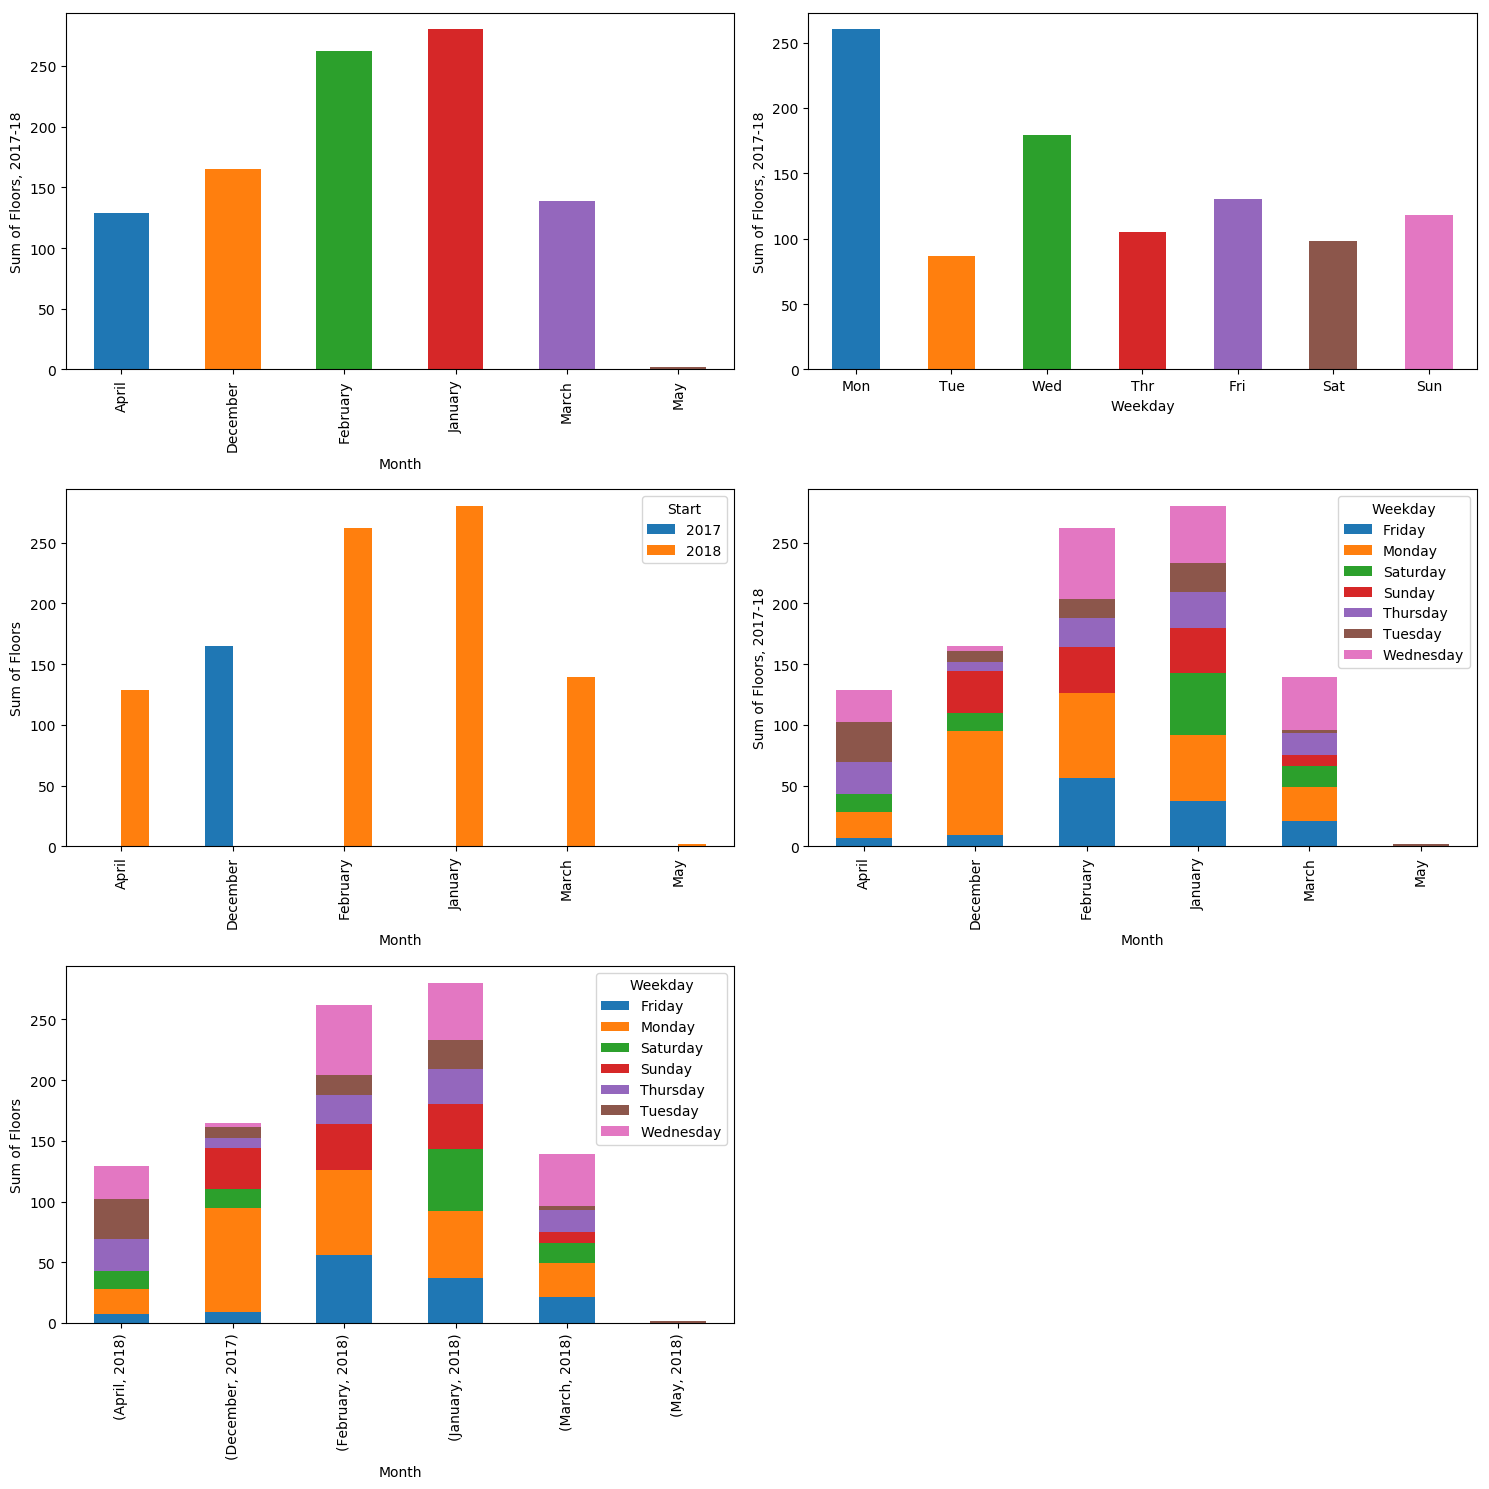

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (15,15), dpi = 100)

floor_dfmfn.groupby(floor_dfmfn['Month'])['Floor'].sum().plot(kind='bar', ax = axes[0,0])
# floor_dfmfn.groupby(floor_dfmfn['Start'].dt.month)['Floor'].sum().plot(kind='bar', ax = axes[0,0])
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Sum of Floors, 2017-18")
#axes[0,0].set_title("Sum of Floors vs Month")


floor_dfmfn.groupby(floor_dfmfn['Start'].dt.weekday)['Floor'].sum().plot(kind='bar',ax = axes[0,1])
my_xticks = ['Mon','Tue','Wed','Thr', "Fri", 'Sat', 'Sun']
axes[0,1].set_xticklabels( my_xticks,  rotation=0)
axes[0,1].set_xlabel("Weekday")
axes[0,1].set_ylabel("Sum of Floors, 2017-18")


floor_dfmfn.groupby([floor_dfmfn['Month'],floor_dfmfn['Start'].dt.year])['Floor'].sum().unstack()\
.plot(kind='bar', ax = axes[1,0])
axes[1,0].set_xlabel("Month")
axes[1,0].set_ylabel("Sum of Floors")


floor_dfmfn.groupby([floor_dfmfn['Month'],floor_dfmfn['Weekday']])['Floor'].\
sum().unstack().plot(kind='bar', ax = axes[1,1], stacked=True)

# floor_dfmfn.groupby([floor_dfmfn['Start'].dt.month,floor_dfmfn['Weekday']])['Floor'].\
# sum().unstack().plot(kind='bar', ax = axes[1,1], stacked=True)
axes[1,1].set_xlabel("Month")
axes[1,1].set_ylabel("Sum of Floors, 2017-18")



floor_dfmfn.groupby([floor_dfmfn['Month'],floor_dfmfn['Start'].dt.year, floor_dfmfn['Weekday']])['Floor']\
.sum().unstack().plot(kind='bar',stacked=True,ax = axes[2,0])
axes[2,0].set_xlabel("Month")
axes[2,0].set_ylabel("Sum of Floors")


fig.delaxes(axes[2,1])

fig.tight_layout()


In [34]:
# We cannot say too much about the pattern of floor climbing. Because the data is only for 5 months. However we can say that
# on Feb and Jan 2018 he/She climbed more than 250 floors.  April and March 2018 were the months with less floor climbing (May is neglected).
# In additin, if we focus on weekdays, it seems that he used to climb more floors on Mondays mostly on December 2017.

## Importing heart rate dataframe

In [35]:
heartr_df = pd.read_csv('./data/heart_rate.csv')
heartr_df.head()

Unnamed: 0                 end_time  heart_rate binning_data  \
0           0  2017-12-16 04:30:29.450        60.0          NaN   
1           1  2017-12-16 05:50:29.380        56.0          NaN   
2           2  2017-12-30 02:08:16.211        55.0          NaN   
3           3  2018-01-15 14:47:37.175        62.0          NaN   
4           4  2017-12-16 02:20:29.470        47.0          NaN   

                start_time  heart_beat_count              update_time  max  \
0  2017-12-16 04:30:29.450                 1  2017-12-16 04:35:00.341  0.0   
1  2017-12-16 05:50:29.380                 1  2017-12-16 05:55:00.264  0.0   
2  2017-12-30 02:08:16.211                 1  2017-12-30 02:08:16.411  0.0   
3  2018-01-15 14:47:37.175                 1  2018-01-15 14:47:37.371  0.0   
4  2017-12-16 02:20:29.470                 1  2017-12-16 02:35:00.252  0.0   

   min                     pkg_name time_offset  \
0  0.0  com.sec.android.app.shealth    UTC-0400   
1  0.0  com.sec.android.app.shealth    UTC-0400   
2  0.0  com.sec.android.app.shealth    UTC-0700   
3  0.0  com.sec.android.app.shealth    UTC-0400   
4  0.0  com.sec.android.app.shealth    UTC-0400   

                               datauuid              create_time  
0  00978ee8-6b03-16cb-7bba-d22949a728cb  2017-12-16 04:35:00.341  
1  038d68e5-ddb9-df1f-f52f-4f85c32cb95a  2017-12-16 05:55:00.264  
2  0423adf2-6d1f-6e23-276b-ec25462bf3d5  2017-12-30 02:08:16.411  
3  07dc6531-0aa6-1b07-df29-049197357434  2018-01-15 14:47:37.371  
4  0a32cb55-8257-d3ae-e87a-e38ecb14fe97  2017-12-16 02:35:00.252

In [36]:
heartr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 13 columns):
Unnamed: 0          311 non-null int64
end_time            311 non-null object
heart_rate          311 non-null float64
binning_data        1 non-null object
start_time          311 non-null object
heart_beat_count    311 non-null int64
update_time         311 non-null object
max                 294 non-null float64
min                 294 non-null float64
pkg_name            311 non-null object
time_offset         311 non-null object
datauuid            311 non-null object
create_time         311 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 31.7+ KB


In [37]:
heartr_df[heartr_df['min']!=0]['min'].nunique()

22

In [38]:
heartr_df[heartr_df['max']!=0]['max'].nunique()

22

In [39]:
# Removing unnecessary columns and some modification on time format
heartr_dfn = heartr_df[['start_time','end_time','time_offset','heart_rate','datauuid' ]]
heartr_dfn.rename(columns={'start_time':'Start','end_time':'End', 'time_offset':'Offset',\
                         'heart_rate' :'Heart_Rate', 'datauuid' :'Datauuid'\
                         }, inplace=True)

heartr_dfn['Start'] = pd.to_datetime(heartr_dfn['Start'])
heartr_dfn['End'] = pd.to_datetime(heartr_dfn['End'])

heartr_dfn.head()
#columns min and max were removed because there is only 22 data available for each of them.

C:\Users\Salman\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

Start                     End    Offset  Heart_Rate  \
0 2017-12-16 04:30:29.450 2017-12-16 04:30:29.450  UTC-0400        60.0   
1 2017-12-16 05:50:29.380 2017-12-16 05:50:29.380  UTC-0400        56.0   
2 2017-12-30 02:08:16.211 2017-12-30 02:08:16.211  UTC-0700        55.0   
3 2018-01-15 14:47:37.175 2018-01-15 14:47:37.175  UTC-0400        62.0   
4 2017-12-16 02:20:29.470 2017-12-16 02:20:29.470  UTC-0400        47.0   

                               Datauuid  
0  00978ee8-6b03-16cb-7bba-d22949a728cb  
1  038d68e5-ddb9-df1f-f52f-4f85c32cb95a  
2  0423adf2-6d1f-6e23-276b-ec25462bf3d5  
3  07dc6531-0aa6-1b07-df29-049197357434  
4  0a32cb55-8257-d3ae-e87a-e38ecb14fe97

In [40]:
heartr_dfn['Month'] = heartr_dfn['Start'].dt.month_name()
heartr_dfn['Weekday'] = heartr_dfn['Start'].dt.weekday_name
heartr_dfn['Hour'] = heartr_dfn['Start'].dt.hour

C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [41]:
heartr_dfn.head()

Start                     End    Offset  Heart_Rate  \
0 2017-12-16 04:30:29.450 2017-12-16 04:30:29.450  UTC-0400        60.0   
1 2017-12-16 05:50:29.380 2017-12-16 05:50:29.380  UTC-0400        56.0   
2 2017-12-30 02:08:16.211 2017-12-30 02:08:16.211  UTC-0700        55.0   
3 2018-01-15 14:47:37.175 2018-01-15 14:47:37.175  UTC-0400        62.0   
4 2017-12-16 02:20:29.470 2017-12-16 02:20:29.470  UTC-0400        47.0   

                               Datauuid     Month   Weekday  Hour  
0  00978ee8-6b03-16cb-7bba-d22949a728cb  December  Saturday     4  
1  038d68e5-ddb9-df1f-f52f-4f85c32cb95a  December  Saturday     5  
2  0423adf2-6d1f-6e23-276b-ec25462bf3d5  December  Saturday     2  
3  07dc6531-0aa6-1b07-df29-049197357434   January    Monday    14  
4  0a32cb55-8257-d3ae-e87a-e38ecb14fe97  December  Saturday     2

In [42]:
# To check if using sum of hear rate is a good choice or not!
heartr_dfn[heartr_dfn['Heart_Rate']==0]

Empty DataFrame
Columns: [Start, End, Offset, Heart_Rate, Datauuid, Month, Weekday, Hour]
Index: []

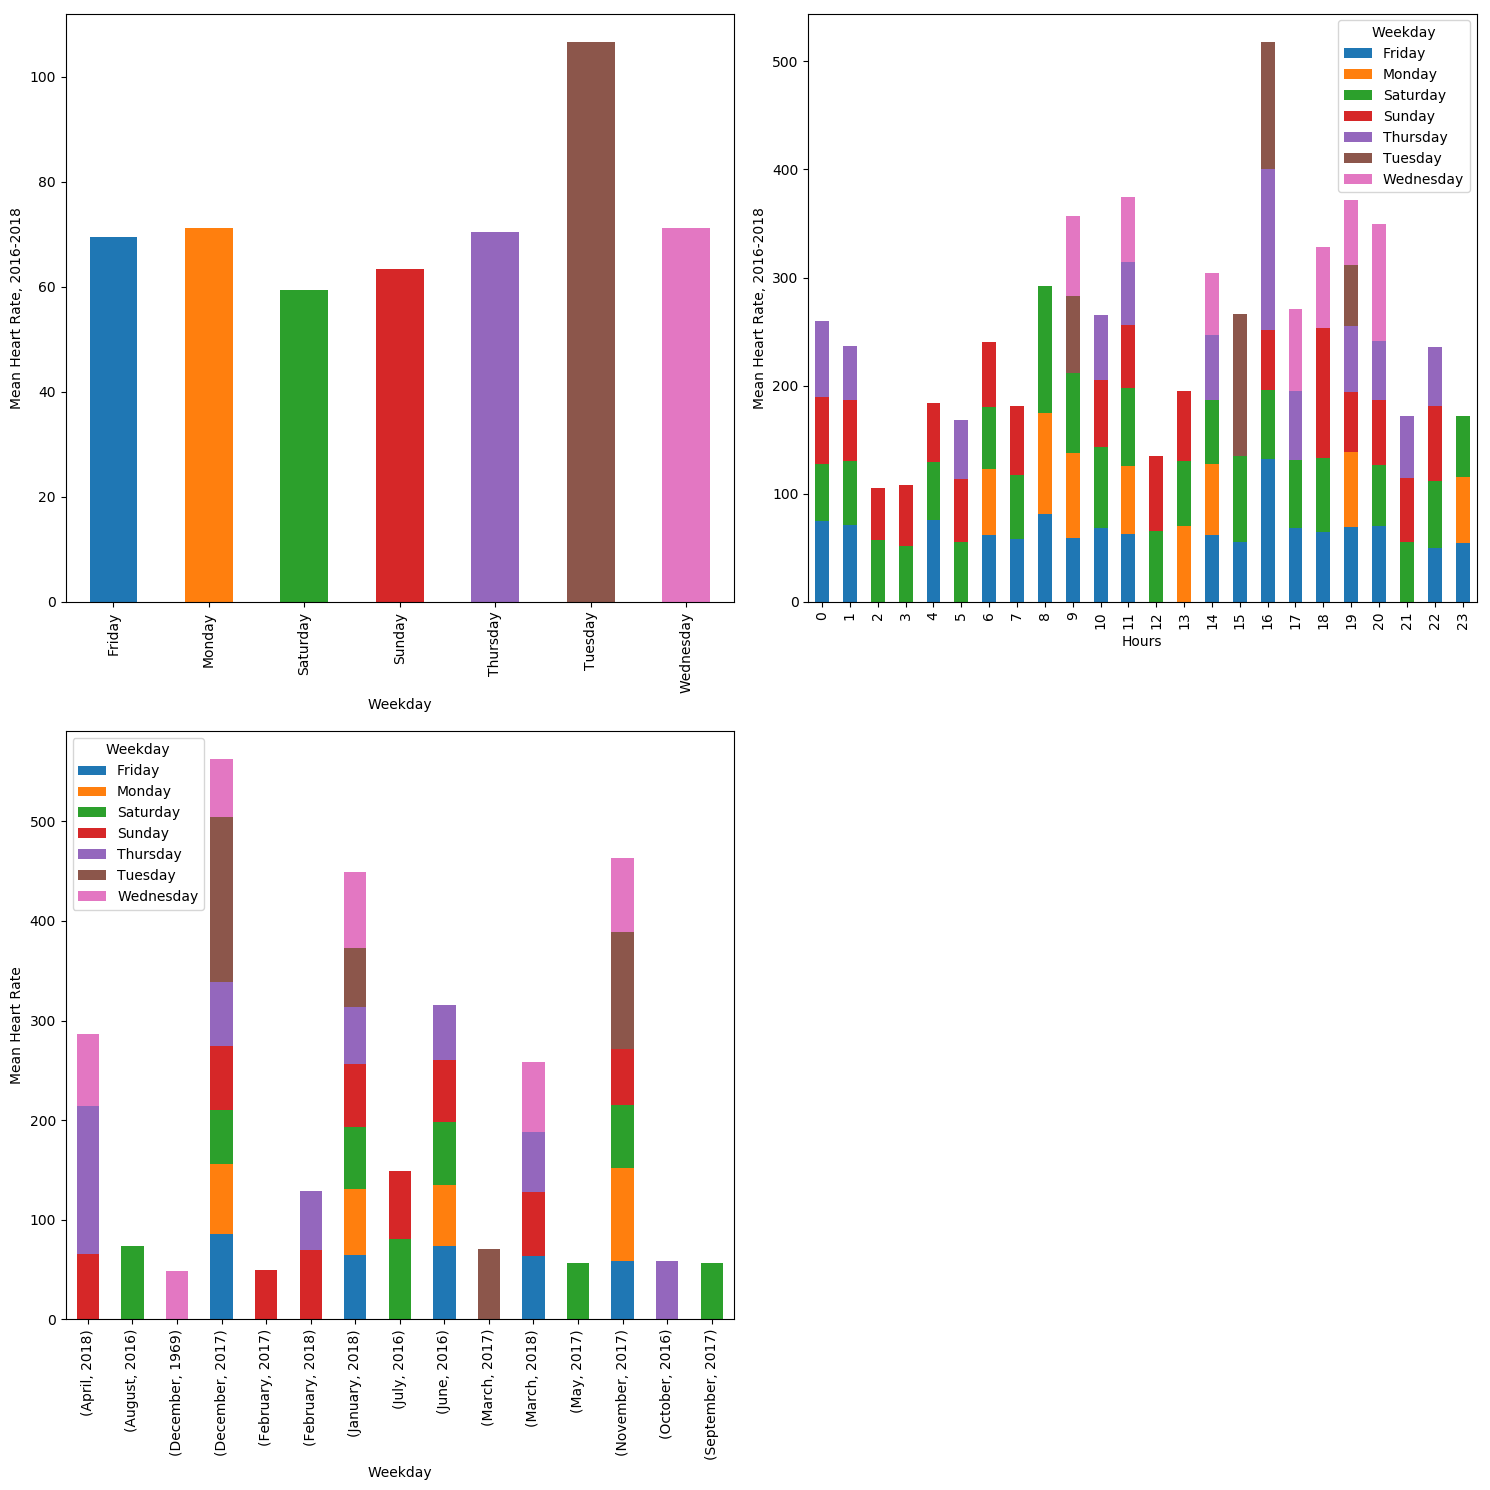

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,15), dpi = 100)

heartr_dfn.groupby(heartr_dfn['Weekday'])['Heart_Rate'].mean().plot(kind='bar', ax = axes[0,0])
axes[0,0].set_xlabel("Weekday")
axes[0,0].set_ylabel("Mean Heart Rate, 2016-2018")


heartr_dfn.groupby([ heartr_dfn['Hour'],heartr_dfn['Weekday']])['Heart_Rate']\
.mean().unstack().plot(kind='bar', ax = axes[0,1],stacked=True)
axes[0,1].set_xlabel("Hours")
axes[0,1].set_ylabel("Mean Heart Rate, 2016-2018")


heartr_dfn.groupby([heartr_dfn['Month'], heartr_dfn['Start'].dt.year, heartr_dfn['Weekday']])['Heart_Rate']\
.mean().unstack().plot(kind='bar', ax = axes[1,0],stacked=True)
axes[1,0].set_xlabel("Weekday")
axes[1,0].set_ylabel("Mean Heart Rate")



fig.delaxes(axes[1,1])

fig.tight_layout()

In [44]:
# From the above plots, it seems that the mean of heart rate between 2016 and 2018 is high on Tuesday especially on Dec 2017.
# Add to that on Saturdays at 8 am, and on Tuesday, Thursday and Friday at 4 pm the individual has a high herat rate.


## Importing Step dataframe

In [45]:
stepc_df = pd.read_csv('./data/step_count.csv')
stepc_df.head()

Unnamed: 0                 end_time               start_time  count  \
0           0  2018-04-30 18:21:59.999  2018-04-30 18:21:00.000    101   
1           1  2018-04-13 19:47:59.999  2018-04-13 19:47:00.000     25   
2           2  2018-04-02 10:01:59.999  2018-04-02 10:01:00.000     38   
3           3  2018-04-27 10:52:59.999  2018-04-27 10:52:00.000     35   
4           4  2018-04-21 13:47:00.000  2018-04-21 13:46:00.000      0   

   calorie              update_time     speed                     pkg_name  \
0     4.29  2018-04-30 18:35:00.291  1.527778  com.sec.android.app.shealth   
1     0.96  2018-04-13 19:55:00.251  1.027778  com.sec.android.app.shealth   
2     1.53  2018-04-02 10:14:58.210  1.194444  com.sec.android.app.shealth   
3     1.45  2018-04-27 10:55:01.281  1.500000  com.sec.android.app.shealth   
4     0.00  2018-04-21 13:46:36.801  0.000000  com.sec.android.app.shealth   

  time_offset  distance                              datauuid  \
0    UTC-0300     78.42  0001af94-3253-4fec-0efc-153d3a8a2441   
1    UTC-0300     14.36  0001c2a5-c751-4c86-456f-179d46bd29a9   
2    UTC-0300     24.19  0003c0db-c795-1f80-17a4-582751b3a2ba   
3    UTC-0300     27.45  0006c29c-72a3-b207-069e-b098a9f96252   
4    UTC-0300      0.00  001e163d-0af5-4e9a-b7c9-a9ceb6ca5e8c   

               create_time  
0  2018-04-30 18:35:00.290  
1  2018-04-13 19:55:00.251  
2  2018-04-02 10:14:58.209  
3  2018-04-27 10:55:01.280  
4  2018-04-21 13:46:36.801

In [46]:
stepc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9758 entries, 0 to 9757
Data columns (total 12 columns):
Unnamed: 0     9758 non-null int64
end_time       9758 non-null object
start_time     9758 non-null object
count          9758 non-null int64
calorie        9758 non-null float64
update_time    9758 non-null object
speed          9758 non-null float64
pkg_name       9758 non-null object
time_offset    9758 non-null object
distance       9758 non-null float64
datauuid       9758 non-null object
create_time    9758 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 914.9+ KB


In [47]:
stepc_dfn = stepc_df[['start_time','end_time','time_offset','count','calorie','speed','distance','datauuid']]
stepc_dfn.rename(columns={'start_time':'Start','end_time':'End', 'time_offset':'Offset',\
                         'count' :'Count','calorie': 'Calorie','speed':'Speed','distance':'Distance','datauuid' :'Datauuid'\
                         }, inplace=True)
stepc_dfn['Start'] = pd.to_datetime(stepc_dfn['Start'])
stepc_dfn['End'] = pd.to_datetime(stepc_dfn['End'])

stepc_dfn['Weekday'] = stepc_dfn['Start'].dt.weekday_name
stepc_dfn['Hour'] = stepc_dfn['Start'].dt.hour

stepc_dfn.head()

C:\Users\Salman\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Start                     End    Offset  Count  Calorie  \
0 2018-04-30 18:21:00 2018-04-30 18:21:59.999  UTC-0300    101     4.29   
1 2018-04-13 19:47:00 2018-04-13 19:47:59.999  UTC-0300     25     0.96   
2 2018-04-02 10:01:00 2018-04-02 10:01:59.999  UTC-0300     38     1.53   
3 2018-04-27 10:52:00 2018-04-27 10:52:59.999  UTC-0300     35     1.45   
4 2018-04-21 13:46:00 2018-04-21 13:47:00.000  UTC-0300      0     0.00   

      Speed  Distance                              Datauuid   Weekday  Hour  
0  1.527778     78.42  0001af94-3253-4fec-0efc-153d3a8a2441    Monday    18  
1  1.027778     14.36  0001c2a5-c751-4c86-456f-179d46bd29a9    Friday    19  
2  1.194444     24.19  0003c0db-c795-1f80-17a4-582751b3a2ba    Monday    10  
3  1.500000     27.45  0006c29c-72a3-b207-069e-b098a9f96252    Friday    10  
4  0.000000      0.00  001e163d-0af5-4e9a-b7c9-a9ceb6ca5e8c  Saturday    13

In [48]:
#To check the number of zeros for columns Calorie, Speed, Distance, and Count:
9758  - stepc_dfn['Calorie'].astype(bool).sum(axis=0)

29

In [49]:
# To remove zero values
stepc_dfn = stepc_dfn[stepc_dfn['Calorie']!=0]

In [50]:
stepc_dfn['Start'].min()

Timestamp('2018-03-31 07:01:00')

In [51]:
stepc_dfn['Start'].max()

Timestamp('2018-05-03 09:17:00')

In [52]:
# The range of data of this dataframe is about one month.

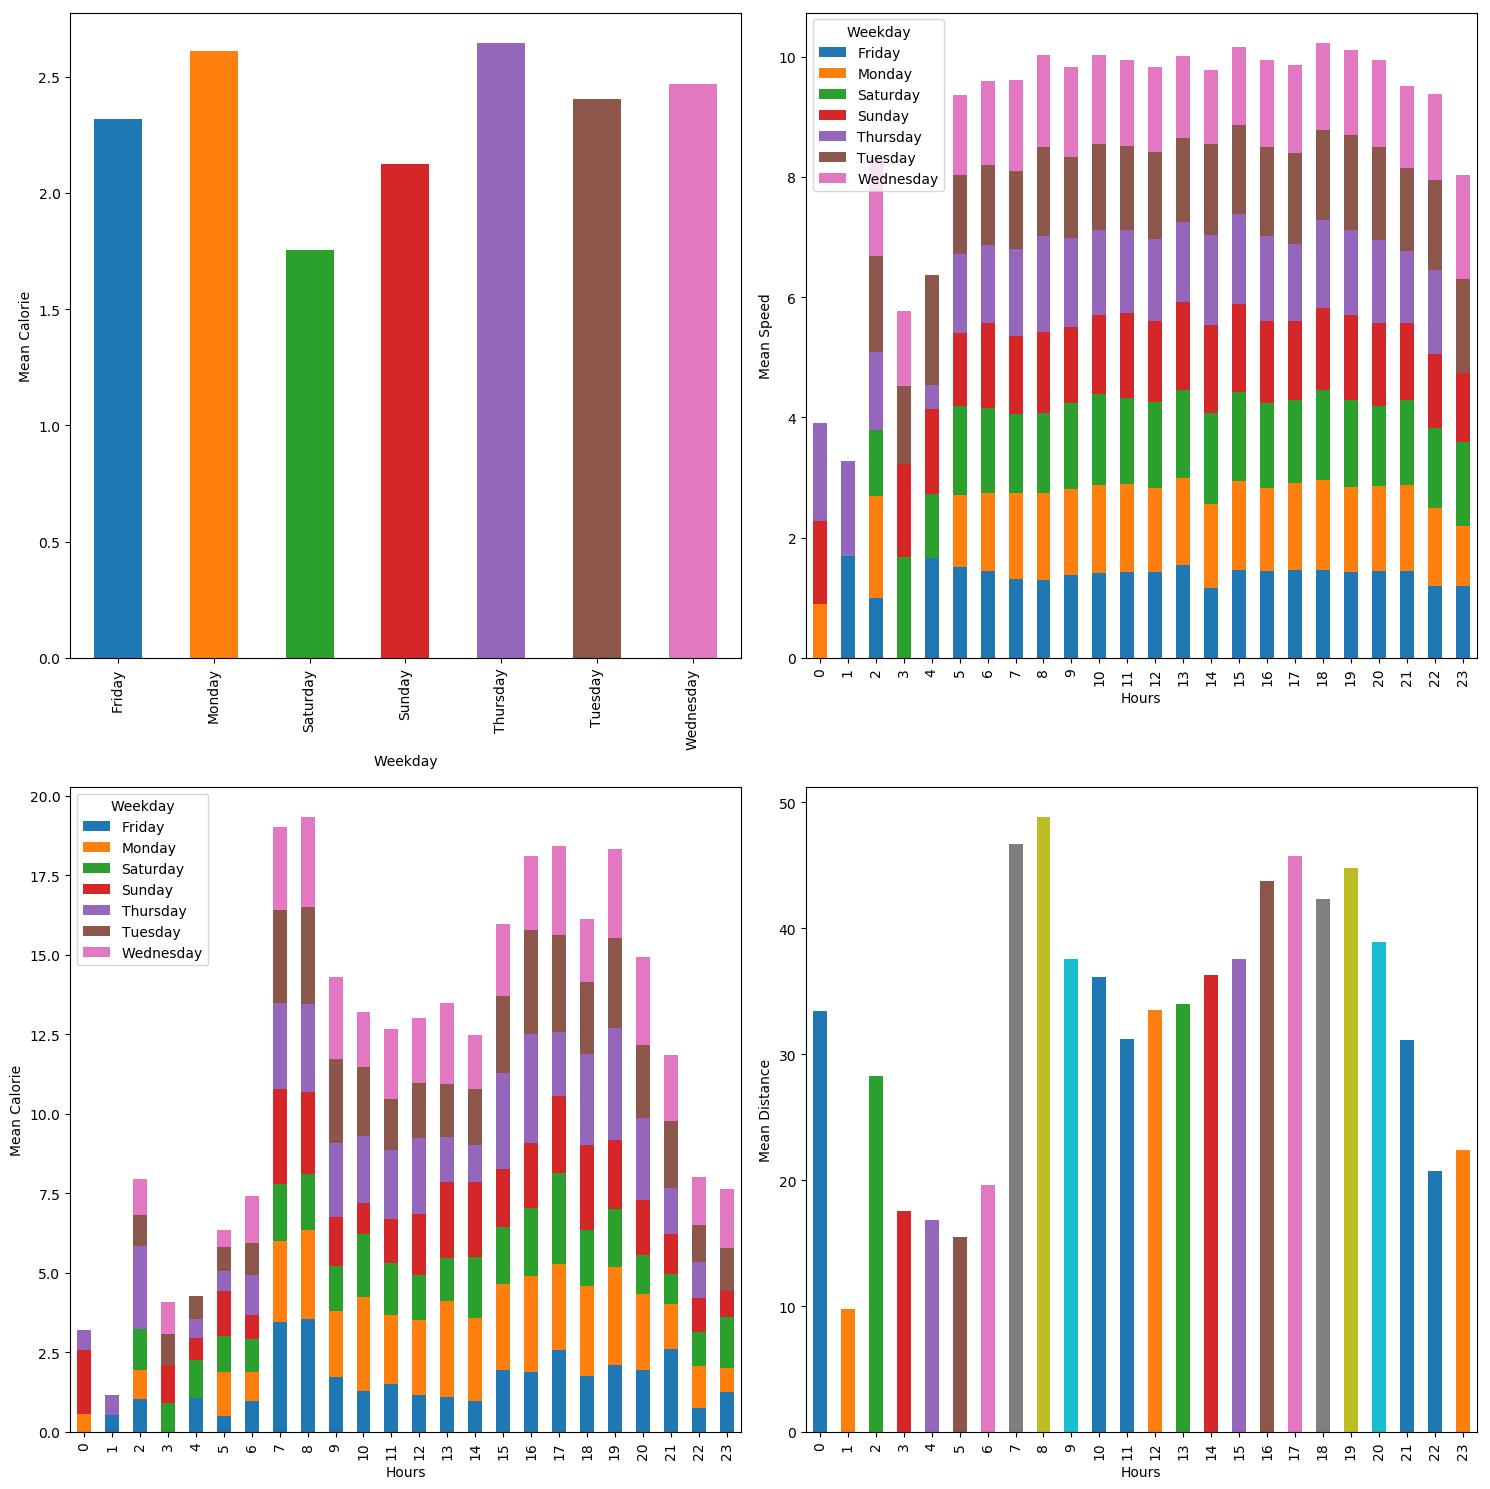

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,15), dpi = 100)

stepc_dfn.groupby(stepc_dfn['Weekday'])['Calorie'].mean().plot(kind='bar', ax = axes[0,0])
axes[0,0].set_xlabel("Weekday")
axes[0,0].set_ylabel("Mean Calorie")

stepc_dfn.groupby([stepc_dfn['Hour'], stepc_dfn['Weekday']])['Speed']\
.mean().unstack().plot(kind='bar', ax = axes[0,1],stacked=True)
axes[0,1].set_xlabel("Hours")
axes[0,1].set_ylabel("Mean Speed")


stepc_dfn.groupby([stepc_dfn['Hour'], stepc_dfn['Weekday']])['Calorie']\
.mean().unstack().plot(kind='bar', ax = axes[1,0],stacked=True)
axes[1,0].set_xlabel("Hours")
axes[1,0].set_ylabel("Mean Calorie")

stepc_dfn.groupby([stepc_dfn['Hour']])['Distance']\
.mean().plot(kind='bar', ax = axes[1,1])
axes[1,1].set_xlabel("Hours")
axes[1,1].set_ylabel("Mean Distance")


fig.tight_layout()

In [54]:
# There is no need to plot the graph of count because it has a similar pattern to distance and calorie.
# From the pattern of speed one can conclude that walking was the main activity because the mean of speed is mostly between 1 and 2 m/s.

In [55]:
# On average the person walks more on Thursdays and Mondays. In addition he/she walks more (on average) at 8 am. This means that 
# he/she burns more calories at 8 amish.

## Importing exercise dataframe

In [56]:
exerc_df = pd.read_csv('./data/exercise.csv')
pd.options.display.max_columns = 100
exerc_df.head()

Unnamed: 0                 end_time  altitude_loss  max_altitude  \
0           0  2018-04-07 17:40:40.673            NaN           NaN   
1           1  2018-01-27 10:08:00.000            NaN           NaN   
2           2  2018-05-01 18:12:20.915            NaN           NaN   
3           3  2018-02-24 13:50:02.929            NaN           NaN   
4           4  2018-03-16 17:25:39.584            NaN           NaN   

                start_time  count  altitude_gain  exercise_custom_type  \
0  2018-04-07 17:26:10.149    NaN            NaN                   NaN   
1  2018-01-27 09:38:00.000    0.0            NaN                   NaN   
2  2018-05-01 18:01:24.059    NaN            NaN                   NaN   
3  2018-02-24 13:35:13.243    NaN            NaN                   NaN   
4  2018-03-16 17:15:20.192    NaN            NaN                   NaN   

   duration  deviceuuid  max_heart_rate  max_rpm  mean_heart_rate  \
0    870524  F/D7+hL5E5             0.0      NaN              0.0   
1   1800000  jQfnryI8/B             NaN      NaN              NaN   
2    656856  F/D7+hL5E5             0.0      NaN              0.0   
3    889686  F/D7+hL5E5             0.0      NaN              0.0   
4    619392  F/D7+hL5E5             0.0      NaN              0.0   

                      pkg_name  max_cadence time_offset  \
0  com.sec.android.app.shealth          0.0    UTC-0300   
1  com.sec.android.app.shealth          NaN    UTC-0400   
2  com.sec.android.app.shealth          0.0    UTC-0300   
3  com.sec.android.app.shealth          0.0    UTC-0400   
4  com.sec.android.app.shealth          0.0    UTC-0300   

   mean_caloricburn_rate  incline_distance  exercise_type  decline_distance  \
0                    NaN               NaN           1001               NaN   
1                    NaN               NaN          14001               NaN   
2                    NaN               NaN           1001               NaN   
3                    NaN               NaN          11007               NaN   
4                    NaN               NaN           1001               NaN   

   max_speed  mean_power  max_power  mean_rpm  calorie  mean_cadence  \
0   1.588526         NaN        NaN       NaN   58.420           0.0   
1        NaN         NaN        NaN       NaN  252.000           NaN   
2   1.571783         NaN        NaN       NaN   43.850           0.0   
3        NaN         NaN        NaN       NaN  166.074           0.0   
4   1.611111         NaN        NaN       NaN   42.630           0.0   

   mean_speed              update_time  min_altitude  min_heart_rate  \
0    1.257754  2018-04-07 17:41:42.416           NaN             0.0   
1    0.000000  2018-01-27 10:09:23.176           NaN             NaN   
2    1.323111  2018-05-01 18:13:21.374           NaN             0.0   
3         NaN  2018-02-24 13:52:08.229           NaN             0.0   
4    1.413036  2018-03-16 17:26:39.581           NaN             0.0   

   count_type                                          live_data  \
0         NaN  009c4899-f8fb-c887-294a-045dcce7c880.live_data...   
1     30004.0                                                NaN   
2         NaN  020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...   
3         NaN  0282b74e-1956-64c6-8ac9-5c44afdcb6c1.live_data...   
4         NaN  02c7f233-9af6-3288-e412-21747dcd9a98.live_data...   

   max_caloricburn_rate  custom comment  additional  distance  \
0                   NaN     NaN     NaN         NaN  1008.610   
1                   NaN     NaN     NaN         NaN     0.000   
2                   NaN     NaN     NaN         NaN   765.120   
3                   NaN     NaN     NaN         NaN       NaN   
4                   NaN     NaN     NaN         NaN   741.521   

                               datauuid              create_time  
0  009c4899-f8fb-c887-294a-045dcce7c880  2018-04-07 17:41:42.416  
1  013f807f-0b24-45da-9df7-446c2e297a4f  2018-01-27 10:08:40.225  
2  020502c3-3cc7-8d

In [57]:
exerc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 39 columns):
Unnamed: 0               341 non-null int64
end_time                 341 non-null object
altitude_loss            7 non-null float64
max_altitude             10 non-null float64
start_time               341 non-null object
count                    36 non-null float64
altitude_gain            7 non-null float64
exercise_custom_type     0 non-null float64
duration                 341 non-null int64
deviceuuid               341 non-null object
max_heart_rate           219 non-null float64
max_rpm                  0 non-null float64
mean_heart_rate          219 non-null float64
pkg_name                 341 non-null object
max_cadence              220 non-null float64
time_offset              341 non-null object
mean_caloricburn_rate    0 non-null float64
incline_distance         51 non-null float64
exercise_type            341 non-null int64
decline_distance         51 non-null float64


In [58]:
exerc_df['deviceuuid'].unique()

array(['F/D7+hL5E5', 'jQfnryI8/B'], dtype=object)

In [59]:
exerc_dfn = exerc_df[['start_time','end_time','time_offset','duration','max_heart_rate',\
                      'mean_heart_rate','min_heart_rate','max_cadence','mean_cadence','exercise_type',\
                      'max_speed','mean_speed','calorie','distance','datauuid']]

exerc_dfn.rename(columns={'start_time':'Start','end_time':'End','time_offset':'Offset','duration':'Duration',\
                          'max_heart_rate':'Max_HR','mean_heart_rate':'Mean_HR','min_heart_rate':'Min_HR',\
                         'max_cadence':'Max_Cadence','mean_cadence':'Mean_Cadence','exercise_type':'Exercise_Type',\
                         'max_speed':'Max_Speed','mean_speed':'Mean_Speed','calorie':'Calorie',\
                         'distance':'Distance','datauuid':'Datauuid'}, inplace=True)

exerc_dfn['Start'] = pd.to_datetime(exerc_dfn['Start'])
exerc_dfn['End'] = pd.to_datetime(exerc_dfn['End'])

exerc_dfn['Month'] = exerc_dfn['Start'].dt.month_name()
exerc_dfn['Weekday'] = exerc_dfn['Start'].dt.weekday_name
exerc_dfn['Hour'] = exerc_dfn['Start'].dt.hour
exerc_dfn['Duration'] = exerc_dfn['Duration']/60000 # duration in minute



C:\Users\Salman\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [60]:
# Function used to change the exercise_type to string based on "www.developer.samsung.com"
def excer(type):
    if type == 1001:
        return('Walking')
    elif type == 14001:
        return('Swimming')
    elif type == 11007:
        return('Cycling')
    elif type == 13001:
        return('Hiking')
    elif type == 1002:
        return('Running')
    else:
        return('Trainer Effort')

#1001-walking; 14001-Swimming; 11007-Cycling; 13001-Hiking; 1002-Running; 15006-Eliptical Trainer moderate effort

exerc_dfn['Exercise_Type'] = exerc_dfn.apply(lambda row: excer(row['Exercise_Type']),axis=1 ) 
exerc_dfn.head()

C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Start                     End    Offset   Duration  \
0 2018-04-07 17:26:10.149 2018-04-07 17:40:40.673  UTC-0300  14.508733   
1 2018-01-27 09:38:00.000 2018-01-27 10:08:00.000  UTC-0400  30.000000   
2 2018-05-01 18:01:24.059 2018-05-01 18:12:20.915  UTC-0300  10.947600   
3 2018-02-24 13:35:13.243 2018-02-24 13:50:02.929  UTC-0400  14.828100   
4 2018-03-16 17:15:20.192 2018-03-16 17:25:39.584  UTC-0300  10.323200   

   Max_HR  Mean_HR  Min_HR  Max_Cadence  Mean_Cadence Exercise_Type  \
0     0.0      0.0     0.0          0.0           0.0       Walking   
1     NaN      NaN     NaN          NaN           NaN      Swimming   
2     0.0      0.0     0.0          0.0           0.0       Walking   
3     0.0      0.0     0.0          0.0           0.0       Cycling   
4     0.0      0.0     0.0          0.0           0.0       Walking   

   Max_Speed  Mean_Speed  Calorie  Distance  \
0   1.588526    1.257754   58.420  1008.610   
1        NaN    0.000000  252.000     0.000   
2   1.571783    1.323111   43.850   765.120   
3        NaN         NaN  166.074       NaN   
4   1.611111    1.413036   42.630   741.521   

                               Datauuid     Month   Weekday  Hour  
0  009c4899-f8fb-c887-294a-045dcce7c880     April  Saturday    17  
1  013f807f-0b24-45da-9df7-446c2e297a4f   January  Saturday     9  
2  020502c3-3cc7-8d33-f7bc-2d8e27609a47       May   Tuesday    18  
3  0282b74e-1956-64c6-8ac9-5c44afdcb6c1  February  Saturday    13  
4  02c7f233-9af6-3288-e412-21747dcd9a98     March    Friday    17

In [61]:
exerc_dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 18 columns):
Start            341 non-null datetime64[ns]
End              341 non-null datetime64[ns]
Offset           341 non-null object
Duration         341 non-null float64
Max_HR           219 non-null float64
Mean_HR          219 non-null float64
Min_HR           219 non-null float64
Max_Cadence      220 non-null float64
Mean_Cadence     220 non-null float64
Exercise_Type    341 non-null object
Max_Speed        256 non-null float64
Mean_Speed       329 non-null float64
Calorie          341 non-null float64
Distance         329 non-null float64
Datauuid         341 non-null object
Month            341 non-null object
Weekday          341 non-null object
Hour             341 non-null int64
dtypes: datetime64[ns](2), float64(10), int64(1), object(5)
memory usage: 48.0+ KB


In [62]:
# To check the number of zeros for the columns Colorie, Duration
341 - exerc_dfn['Calorie'].astype(bool).sum(axis=0)
341 - exerc_dfn['Duration'].astype(bool).sum(axis=0)
# Both columns have no zero values.

0

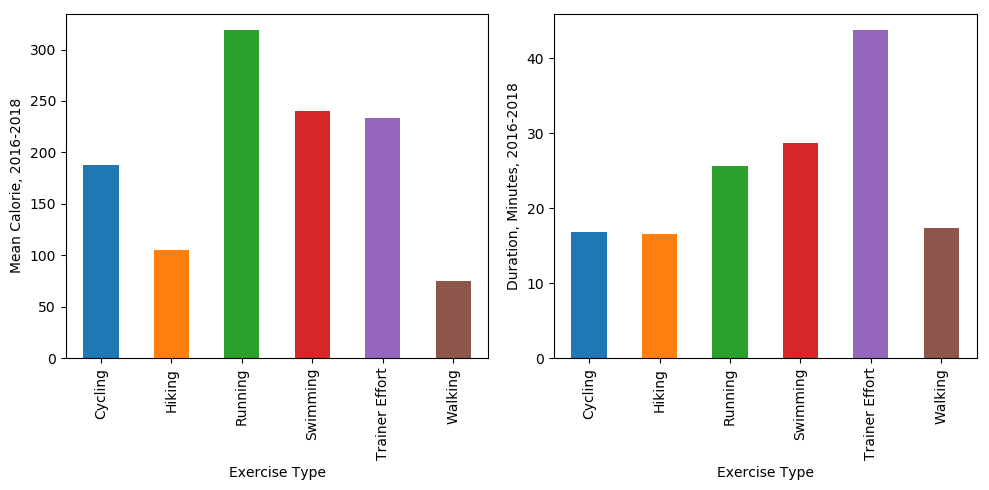

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5), dpi = 100)


exerc_dfn.groupby(exerc_dfn['Exercise_Type'])['Calorie'].mean().plot(kind='bar', ax = axes[0])
axes[0].set_xlabel("Exercise Type")
axes[0].set_ylabel("Mean Calorie, 2016-2018")


exerc_dfn.groupby(exerc_dfn['Exercise_Type'])['Duration'].mean().plot(kind='bar', ax = axes[1])
axes[1].set_xlabel("Exercise Type")
axes[1].set_ylabel("Duration, Minutes, 2016-2018")


fig.tight_layout()

In [64]:
# It is clear that running burns the most calorie and during walking less calorie burns.  In addition, the person dedicated 
# most of his/her time on Eliptical Trainer Moderate Effort. In addition, According to the amount of calorie, this activity (Trainer Effort)
# burns less calorie.

In [65]:
# First Working with columns with minimum nan values : Start, End, Duration, Calorie and Exercise type

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (100,100))

exerc_dfn.groupby([exerc_dfn['Month'],exerc_dfn['Weekday']])['Calorie'].mean().unstack().plot(kind='bar', ax = axes[0,0],stacked=True)
axes[0,0].set_xlabel("Month",fontsize = 100.0)
axes[0,0].set_ylabel("Mean Calorie",fontsize = 100.0)
axes[0,0].tick_params(labelsize = 80)
axes[0,0].legend(fontsize=60)

exerc_dfn.groupby([exerc_dfn['Month'],exerc_dfn['Weekday']])['Duration'].mean().unstack().plot(kind='bar', ax = axes[0,1],stacked=True)
axes[0,1].set_xlabel("Month",fontsize = 100.0)
axes[0,1].set_ylabel("Mean Duration",fontsize = 100.0)
axes[0,1].tick_params(labelsize = 80)
axes[0,1].legend(fontsize=60)

exerc_dfn.groupby([exerc_dfn['Start'].dt.year,exerc_dfn['Month'],exerc_dfn['Weekday']])['Calorie'].mean().unstack().plot(kind='bar', ax = axes[1,0],stacked=True)
axes[1,0].set_xlabel("Month",fontsize = 100.0)
axes[1,0].set_ylabel("Mean Calorie",fontsize = 100.0)
axes[1,0].tick_params(labelsize = 80)
axes[1,0].legend(fontsize=60)


exerc_dfn.groupby([exerc_dfn['Start'].dt.year,exerc_dfn['Month'],exerc_dfn['Weekday']])['Duration'].mean().unstack().plot(kind='bar', ax = axes[1,1],stacked=True)
axes[1,1].set_xlabel("Month",fontsize = 100.0)
axes[1,1].set_ylabel("Mean Duration",fontsize = 100.0)
axes[1,1].tick_params(labelsize = 80)
axes[1,1].legend(fontsize=60)


fig.tight_layout()


In [66]:
# Comparing the last two plots if we have a big value for maen calorie over small duration (September 2016), we can guess 
# that the individual has running activites and this is shown by plots below (see the plot  below: Mean Duration vs Month)

In [67]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (200,200))
exerc_dfn.groupby([exerc_dfn['Weekday'],exerc_dfn['Exercise_Type']])['Calorie'].mean().unstack().plot(kind='bar', ax = axes[0,0],stacked=True)
axes[0,0].set_xlabel("Weekday",fontsize = 150.0)
axes[0,0].set_ylabel("Mean Calorie",fontsize = 150.0)
axes[0,0].tick_params(labelsize = 140)
axes[0,0].legend(fontsize=110)



exerc_dfn.groupby([exerc_dfn['Weekday'],exerc_dfn['Exercise_Type']])['Duration'].mean().unstack().plot(kind='bar', ax = axes[0,1],stacked=True)
axes[0,1].set_xlabel("Weekday",fontsize = 150.0)
axes[0,1].set_ylabel("Mean Duration",fontsize = 150.0)
axes[0,1].tick_params(labelsize = 140)
axes[0,1].legend(fontsize=110)

exerc_dfn.groupby([exerc_dfn['Start'].dt.year,exerc_dfn['Month'],exerc_dfn['Exercise_Type']])['Duration'].mean().unstack().plot(kind='bar', ax = axes[1,0],stacked=True)
axes[1,0].set_xlabel("Month",fontsize = 150.0)
axes[1,0].set_ylabel("Mean Duration",fontsize = 150.0)
axes[1,0].tick_params(labelsize = 140)
axes[1,0].legend(fontsize=110)


exerc_dfn.groupby([exerc_dfn['Start'].dt.year,exerc_dfn['Month'],exerc_dfn['Weekday'],exerc_dfn['Exercise_Type']])['Duration'].mean().unstack().plot(kind='bar', ax = axes[1,1],stacked=True)
axes[1,1].set_xlabel("Weekday",fontsize = 150.0)
axes[1,1].set_ylabel("Mean Duration",fontsize = 150.0)
axes[1,1].tick_params(labelsize = 140)
axes[1,1].legend(fontsize=110)

# excer_dfn.groupby([excer_dfn['Start'].dt.year, excer_dfn['Month'],excer_dfn['Weekday']])['Distance'].mean().unstack().plot(kind='bar', ax = axes[2,0],stacked=True)
# axes[2,0].set_xlabel("Weekday",fontsize = 150.0)
# axes[2,0].set_ylabel("Mean Distance",fontsize = 150.0)
# axes[2,0].tick_params(labelsize = 140)
# axes[2,0].legend(fontsize=110)

#fig.delaxes(axes[2,1])
fig.tight_layout()


In [68]:
# The pattern of activities changed from mostly walking and running in 2017 to Swimming, Trainer Effort, and walking in 2018.

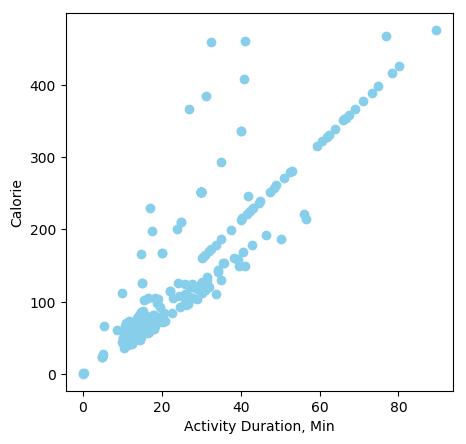

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (5,5), dpi = 100)

y = exerc_dfn['Calorie']
x = exerc_dfn['Duration']
axes.set_xlabel('Activity Duration, Min')
axes.set_ylabel('Calorie')
# axes.set_xticks(range(0,13))
# axes.set_yticks(np.linspace(0,1,21))
axes.plot_date(x, y, xdate=False, ydate=False, color='skyblue')

In [70]:
# we can say that the duration of an activity has a linear relationship  with Calorie.

In [71]:
# I tried to merge heartr_df and exerc_dfn, but it seems it is impossible to combine them based on Start time. If 
# the two dataframes were merged based on day,it is hard (maybe impossible) to find a relationship between the heart 
# rate and exercise type.

new_df = pd.merge(heartr_dfn, exerc_dfn, on='Start')
new_df.head()

Empty DataFrame
Columns: [Start, End_x, Offset_x, Heart_Rate, Datauuid_x, Month_x, Weekday_x, Hour_x, End_y, Offset_y, Duration, Max_HR, Mean_HR, Min_HR, Max_Cadence, Mean_Cadence, Exercise_Type, Max_Speed, Mean_Speed, Calorie, Distance, Datauuid_y, Month_y, Weekday_y, Hour_y]
Index: []

In [72]:
# Now heart rate column in exercise_dfn are considered.

In [73]:
# Removing Nan values and related rows

exerc_dfn2  = exerc_dfn[np.isfinite(exerc_dfn ['Mean_HR'])]
exerc_dfn2.head()

Start                     End    Offset   Duration  \
0 2018-04-07 17:26:10.149 2018-04-07 17:40:40.673  UTC-0300  14.508733   
2 2018-05-01 18:01:24.059 2018-05-01 18:12:20.915  UTC-0300  10.947600   
3 2018-02-24 13:35:13.243 2018-02-24 13:50:02.929  UTC-0400  14.828100   
4 2018-03-16 17:15:20.192 2018-03-16 17:25:39.584  UTC-0300  10.323200   
7 2017-12-29 15:32:24.297 2017-12-29 16:41:21.980  UTC-0700  68.925250   

   Max_HR  Mean_HR  Min_HR  Max_Cadence  Mean_Cadence   Exercise_Type  \
0     0.0      0.0     0.0          0.0           0.0         Walking   
2     0.0      0.0     0.0          0.0           0.0         Walking   
3     0.0      0.0     0.0          0.0           0.0         Cycling   
4     0.0      0.0     0.0          0.0           0.0         Walking   
7   220.0    140.0    79.0          0.0           0.0  Trainer Effort   

   Max_Speed  Mean_Speed  Calorie  Distance  \
0   1.588526    1.257754   58.420  1008.610   
2   1.571783    1.323111   43.850   765.120   
3        NaN         NaN  166.074       NaN   
4   1.611111    1.413036   42.630   741.521   
7        NaN    0.000000  366.661     0.000   

                               Datauuid     Month   Weekday  Hour  
0  009c4899-f8fb-c887-294a-045dcce7c880     April  Saturday    17  
2  020502c3-3cc7-8d33-f7bc-2d8e27609a47       May   Tuesday    18  
3  0282b74e-1956-64c6-8ac9-5c44afdcb6c1  February  Saturday    13  
4  02c7f233-9af6-3288-e412-21747dcd9a98     March    Friday    17  
7  05012792-1bd2-9582-a99d-2bbfa48d99da  December    Friday    15

In [74]:
exerc_dfn2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 340
Data columns (total 18 columns):
Start            219 non-null datetime64[ns]
End              219 non-null datetime64[ns]
Offset           219 non-null object
Duration         219 non-null float64
Max_HR           219 non-null float64
Mean_HR          219 non-null float64
Min_HR           219 non-null float64
Max_Cadence      219 non-null float64
Mean_Cadence     219 non-null float64
Exercise_Type    219 non-null object
Max_Speed        167 non-null float64
Mean_Speed       207 non-null float64
Calorie          219 non-null float64
Distance         207 non-null float64
Datauuid         219 non-null object
Month            219 non-null object
Weekday          219 non-null object
Hour             219 non-null int64
dtypes: datetime64[ns](2), float64(10), int64(1), object(5)
memory usage: 32.5+ KB


In [75]:
# Counting the zero values
219 - exerc_dfn2['Max_HR'].astype(bool).sum(axis=0)
# 219 - excer_dfn2['Mean_HR'].astype(bool).sum(axis=0)

175

In [76]:
# So it seems that only 44 data is available for the hearting rate which is not enough to work on that. 

## Importing Summary dataframe


In [77]:
summary_df = pd.read_csv('./data/summary_last_session.csv')
summary_df.head()

create_time  longest_idle_time  score  \
0  2018-01-14 05:00:56.527           15780000      0   
1  2018-01-03 05:03:32.135           22140000      0   
2  2016-09-02 07:00:51.323           24660000     76   
3  2016-07-24 07:03:17.688           36420000     83   
4  2017-10-22 04:15:01.831           30660000      0   

                                          extra_data  goal    calorie  \
0  00179515-d385-4f61-81a7-2ddd68ac80b2.extra_dat...    -1  927.15780   
1  003f0597-41ad-4f7f-bd02-6683076a1535.extra_dat...    -1  971.60400   
2  004dfa57-ff07-44f3-8d54-d3b9c09d41c5.extra_dat...    60  207.74994   
3  00d6b2b2-0211-4a80-a213-a0c2ef981715.extra_dat...    60  240.44005   
4  00d6cc12-a5c4-41c7-aa76-d81b38d49fb2.extra_dat...    -1  167.93997   

   run_time  deviceuuid              update_time  longest_active_time  \
0     76845  jQfnryI8/B  2018-01-15 12:48:58.842              2400000   
1     43840  jQfnryI8/B  2018-01-04 11:41:12.193              5363575   
2     77742  jQfnryI8/B  2016-09-03 06:20:16.720               240000   
3     55497  jQfnryI8/B  2016-07-25 05:48:14.487               540000   
4      6451  jQfnryI8/B  2017-10-23 01:35:00.001               600000   

        day_time  walk_time                     pkg_name  active_time  \
0  1515888000000    8814507  com.sec.android.app.shealth     11291352   
1  1514937600000    5720581  com.sec.android.app.shealth     11982148   
2  1472774400000    2726451  com.sec.android.app.shealth      2804193   
3  1469318400000    3051950  com.sec.android.app.shealth      3107447   
4  1508630400000    2480173  com.sec.android.app.shealth      2486624   

    distance  others_time  step_count                              datauuid  
0  9196.5030      2400000       12889  00179515-d385-4f61-81a7-2ddd68ac80b2  
1  6962.8965      6217727       13135  003f0597-41ad-4f7f-bd02-6683076a1535  
2  3679.9102            0        4407  004dfa57-ff07-44f3-8d54-d3b9c09d41c5  
3  4135.3003            0        5200  00d6b2b2-0211-4a80-a213-a0c2ef981715  
4  3124.7898            0        4015  00d6cc12-a5c4-41c7-aa76-d81b38d49fb2

In [78]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 18 columns):
create_time            705 non-null object
longest_idle_time      705 non-null int64
score                  705 non-null int64
extra_data             705 non-null object
goal                   705 non-null int64
calorie                705 non-null float64
run_time               705 non-null int64
deviceuuid             705 non-null object
update_time            705 non-null object
longest_active_time    705 non-null int64
day_time               705 non-null int64
walk_time              705 non-null int64
pkg_name               705 non-null object
active_time            705 non-null int64
distance               705 non-null float64
others_time            705 non-null int64
step_count             705 non-null int64
datauuid               705 non-null object
dtypes: float64(2), int64(10), object(6)
memory usage: 99.2+ KB


In [79]:
summary_df['create_time'].nunique()

705

In [80]:
summary_dfn = summary_df[['create_time','longest_active_time','longest_idle_time','active_time','others_time'
                          ,'run_time','walk_time','goal','calorie','distance','step_count']]
summary_dfn.rename(columns={'create_time':'Create','longest_active_time':'LATime','longest_idle_time':'LITime',
                            'active_time':'ATime','others_time':'OTime','run_time':'RunT','walk_time':'WalkT',
                            'goal':'Goal','calorie':'Calorie','distance':'Distance','step_count':'NStep'}, inplace=True)

summary_dfn['Create'] = pd.to_datetime(summary_dfn['Create'])
summary_dfn.loc[:,['LATime','LITime','ATime','OTime','WalkT','RunT']] *= 1/60000

summary_dfn.head()

C:\Users\Salman\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Salman\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

Create     LATime  LITime       ATime       OTime  \
0 2018-01-14 05:00:56.527  40.000000   263.0  188.189200   40.000000   
1 2018-01-03 05:03:32.135  89.392917   369.0  199.702467  103.628783   
2 2016-09-02 07:00:51.323   4.000000   411.0   46.736550    0.000000   
3 2016-07-24 07:03:17.688   9.000000   607.0   51.790783    0.000000   
4 2017-10-22 04:15:01.831  10.000000   511.0   41.443733    0.000000   

       RunT       WalkT  Goal    Calorie   Distance  NStep  
0  1.280750  146.908450    -1  927.15780  9196.5030  12889  
1  0.730667   95.343017    -1  971.60400  6962.8965  13135  
2  1.295700   45.440850    60  207.74994  3679.9102   4407  
3  0.924950   50.865833    60  240.44005  4135.3003   5200  
4  0.107517   41.336217    -1  167.93997  3124.7898   4015

In [81]:
# Zero value count:
# WalkT 2, RunT 29, OTime 673, ATime 2, Distance 2, Nstep 2, LATime 2, Calorie 2.

In [82]:
# I need to define a criterion to explore activities. Activies can be considered based on the Distance column. For example I assumed
# that only activities related to Distance >1000 (m) can be considered.

In [83]:
summary_dfn2 = summary_dfn[summary_dfn['Distance']>1000]

In [84]:
summary_dfn2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 704
Data columns (total 11 columns):
Create      654 non-null datetime64[ns]
LATime      654 non-null float64
LITime      654 non-null float64
ATime       654 non-null float64
OTime       654 non-null float64
RunT        654 non-null float64
WalkT       654 non-null float64
Goal        654 non-null int64
Calorie     654 non-null float64
Distance    654 non-null float64
NStep       654 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 61.3 KB


In [85]:
#Non zero values checked and all the columns have values greater than zero.

In [86]:
# ATime = RunT+WalkT+OTime
summary_dfn2['RunT'][1]+summary_dfn2['WalkT'][1]+summary_dfn2['OTime'][1]

199.70246666666668

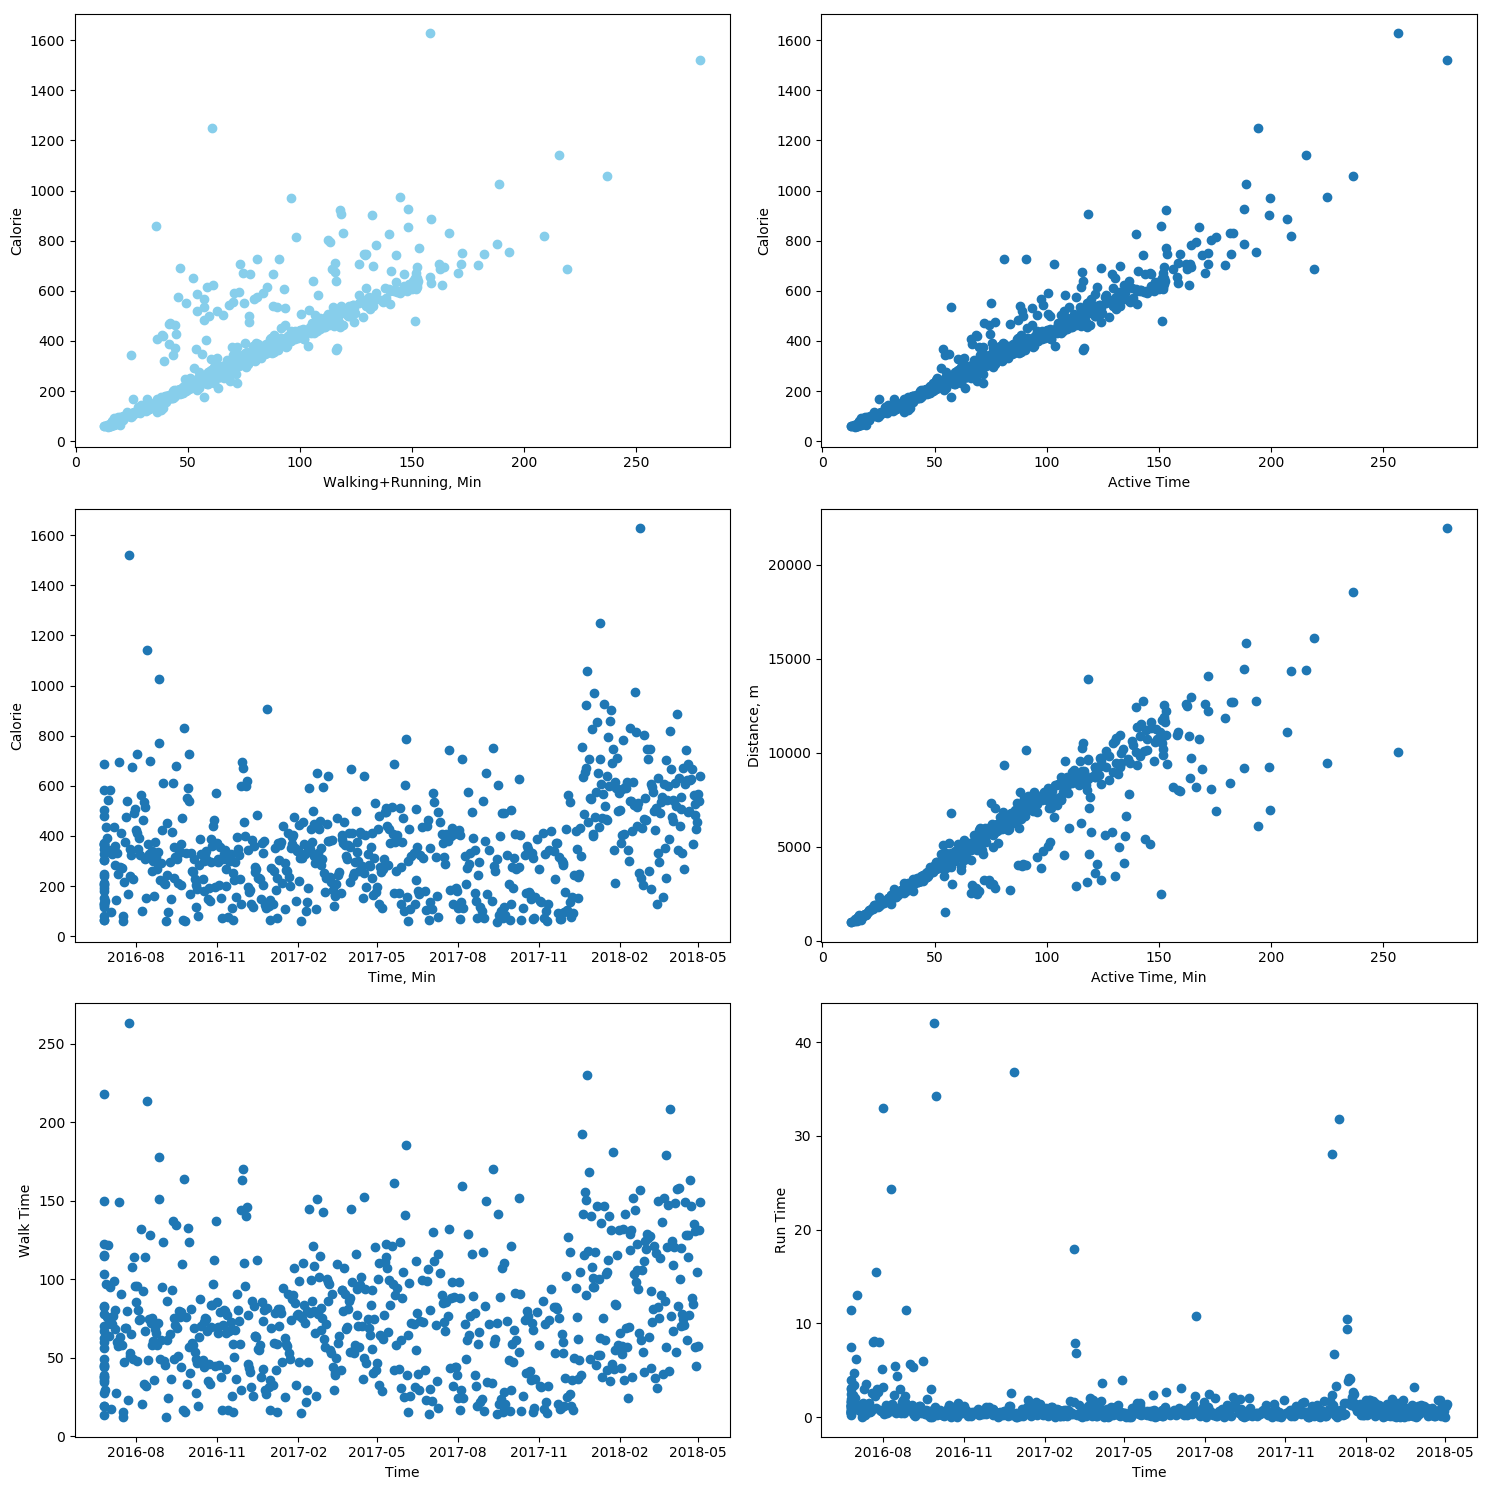

In [87]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (15,15), dpi = 100)

y = summary_dfn2['Calorie']
x = summary_dfn2['RunT']+summary_dfn2['WalkT']
axes[0,0].set_xlabel('Walking+Running, Min')
axes[0,0].set_ylabel('Calorie')
axes[0,0].plot_date(x, y, xdate=False, ydate=False, color='skyblue')

y = summary_dfn2['Calorie']
x = summary_dfn2['ATime']
axes[0,1].set_xlabel('Active Time')
axes[0,1].set_ylabel('Calorie')
axes[0,1].plot_date(x, y, xdate=False, ydate=False)


y = summary_dfn2['Calorie']
x = summary_dfn2['Create']
axes[1,0].set_xlabel('Time, Min')
axes[1,0].set_ylabel('Calorie')
axes[1,0].plot_date(x, y, xdate=False, ydate=False)


y = summary_dfn2['Distance']
x = summary_dfn2['ATime']
axes[1,1].set_xlabel('Active Time, Min')
axes[1,1].set_ylabel('Distance, m')
axes[1,1].plot_date(x, y, xdate=False, ydate=False)


y = summary_dfn2['WalkT']
x = summary_dfn2['Create']
axes[2,0].set_xlabel('Time')
axes[2,0].set_ylabel('Walk Time')
axes[2,0].plot_date(x, y, xdate=False, ydate=False)


y = summary_dfn2['RunT']
x = summary_dfn2['Create']
axes[2,1].set_xlabel('Time')
axes[2,1].set_ylabel('Run Time')
axes[2,1].plot_date(x, y, xdate=False, ydate=False)

fig.tight_layout()



In [88]:
# From the above plots it is clear that the running time is small compared to the walking time. And as showen earlier, 
# there is a linear relationship between activities and calorie. I did not try to work on this dataframe too much because 
# most of the plots and results have already been shown.

In [89]:
# Thank You in advance and Happy New Year!! :)